## 50 Startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
startup = pd.read_csv('50_Startups.csv')

In [5]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
startup[startup['State'] == 'New York']

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
3,144372.41,118671.85,383199.62,New York,182901.99
5,131876.90,99814.71,362861.36,New York,156991.12
8,120542.52,148718.95,311613.29,New York,152211.77
15,114523.61,122616.84,261776.23,New York,129917.04
17,94657.16,145077.58,282574.31,New York,125370.37
19,86419.70,153514.11,0.00,New York,122776.86
21,78389.47,153773.43,299737.29,New York,111313.02
24,77044.01,99281.34,140574.81,New York,108552.04
27,72107.60,127864.55,353183.81,New York,105008.31


In [9]:
startup[startup['State'] == 'California']

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35
16,78013.11,121597.55,264346.06,California,126992.93
20,76253.86,113867.30,298664.47,California,118474.03
25,64664.71,139553.16,137962.62,California,107404.34
32,63408.86,129219.61,46085.25,California,97427.84
34,46426.07,157693.92,210797.67,California,96712.80


In [10]:
startup[startup['State'] == 'Florida']

,R&D Spend,Administration,Marketing Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
7,130298.13,145530.06,323876.68,Florida,155752.60
10,101913.08,110594.11,229160.95,Florida,146121.95
12,93863.75,127320.38,249839.44,Florida,141585.52
14,119943.24,156547.42,256512.92,Florida,132602.65
18,91749.16,114175.79,294919.57,Florida,124266.90
22,73994.56,122782.75,303319.26,Florida,110352.25
23,67532.53,105751.03,304768.73,Florida,108733.99
26,75328.87,144135.98,134050.07,Florida,105733.54


In [11]:
corr_matrix = startup.corr()
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


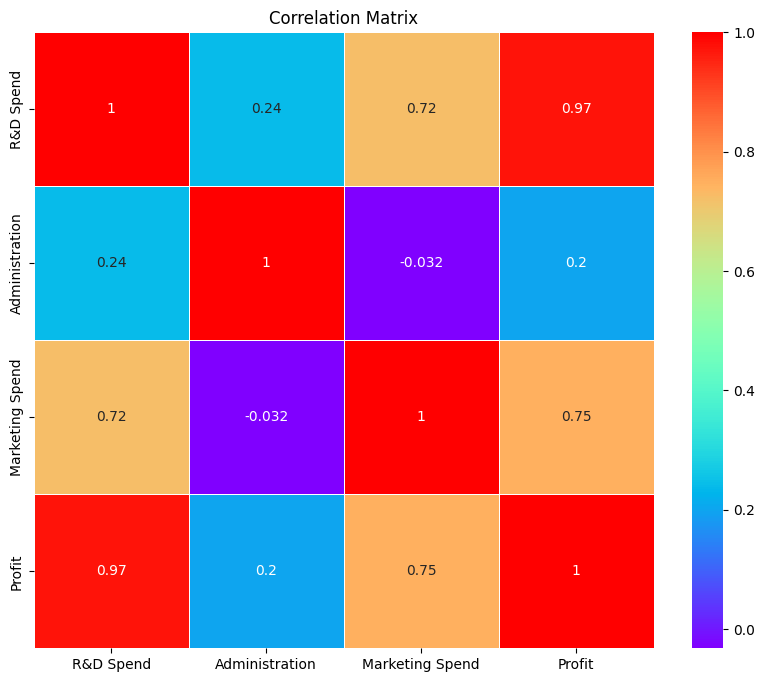

In [12]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="rainbow", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

as we can see that relationship between administration ~ profit variable is low

Preprocessing

In [13]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
startup[startup.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


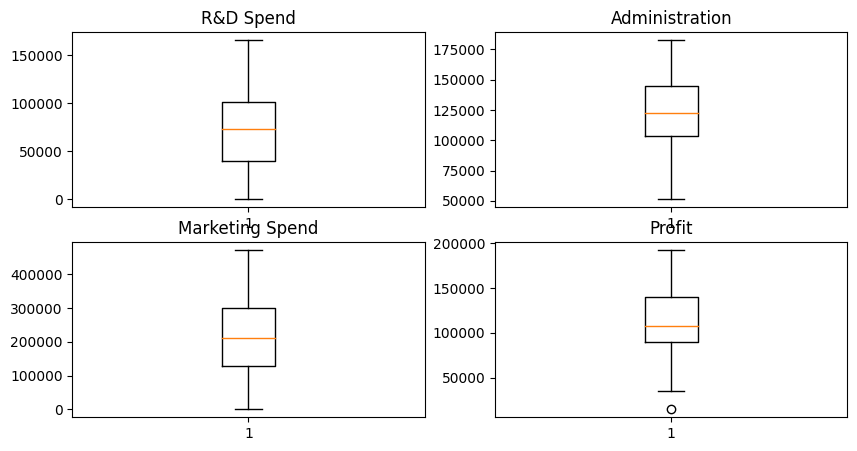

In [15]:
#Finding outliers using boxplot
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.title('R&D Spend')
plt.boxplot(startup['R&D Spend'])

plt.subplot(2,2,2)
plt.title('Administration')
plt.boxplot(startup['Administration'])

plt.subplot(2,2,3)
plt.title('Marketing Spend')
plt.boxplot(startup['Marketing Spend'])

plt.subplot(2,2,4)
plt.title('Profit')
plt.boxplot(startup['Profit'])

plt.show()

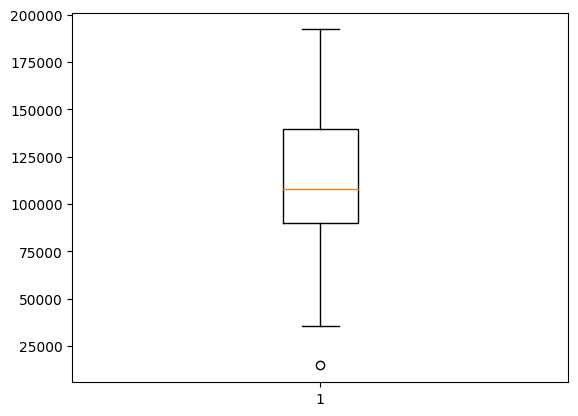

In [16]:
plt.boxplot(startup['Profit'])
plt.show()

as we can see that there is a outlier in the profit in this scenario we can either remove the outlier or we can treat it

<Axes: xlabel='R&D Spend', ylabel='Profit'>

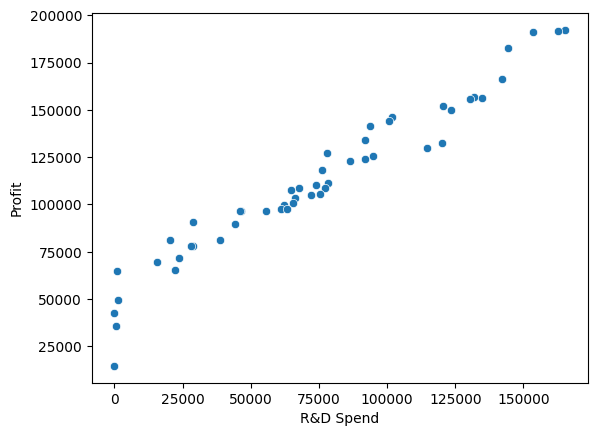

In [17]:
sns.scatterplot(x='R&D Spend',y='Profit', data=startup)

<Axes: xlabel='Administration', ylabel='Profit'>

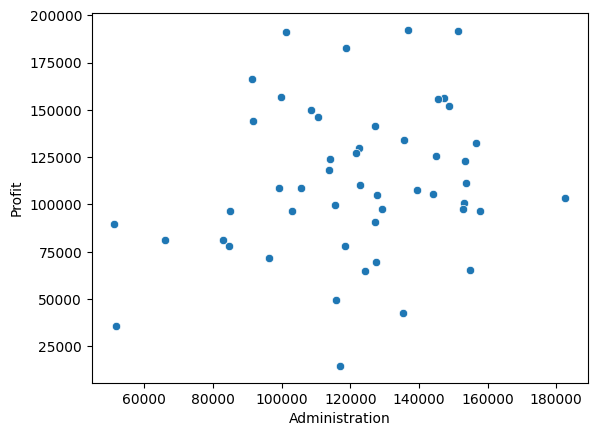

In [18]:
sns.scatterplot(x='Administration',y='Profit', data=startup)

As we can see the above scatter plot we say that Administration spend doesnot affect much on the profit

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

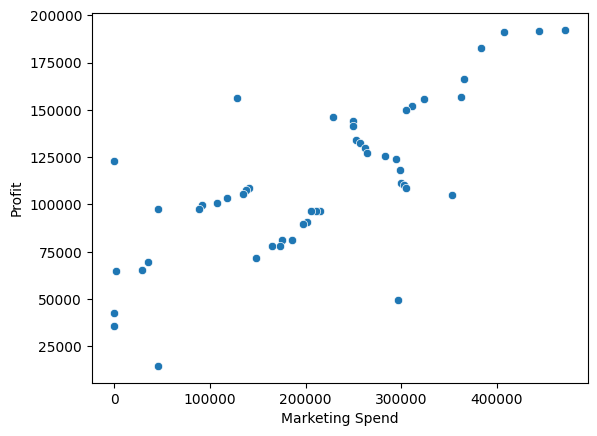

In [19]:
sns.scatterplot(x='Marketing Spend',y='Profit', data=startup)

In [20]:
#outlier
startup[startup['Profit'] < 25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [21]:
#Making separate Columns for States
startup['New York'] = startup['State'].apply(lambda x : 1 if "New York" in x else 0)
startup['California'] = startup['State'].apply(lambda x : 1 if 'California' in x else 0)
startup['Florida'] = startup['State'].apply(lambda x : 1 if 'Florida' in x else 0)

In [22]:
#removing State variabel
startup.drop(columns='State',inplace=True)

Removing Administration, because Administration does not affect much of profit

In [23]:
startup.drop(columns='Administration',inplace=True)

In [24]:
startup.head()

,R&D Spend,Marketing Spend,Profit,New York,California,Florida
0,165349.20,471784.10,192261.83,1,0,0
1,162597.70,443898.53,191792.06,0,1,0
2,153441.51,407934.54,191050.39,0,0,1
3,144372.41,383199.62,182901.99,1,0,0
4,142107.34,366168.42,166187.94,0,0,1


In [25]:
X = startup[['R&D Spend', 'Marketing Spend', 'New York', 'California', 'Florida']]
y = startup['Profit']

In [26]:
X.head()

,R&D Spend,Marketing Spend,New York,California,Florida
0,165349.20,471784.10,1,0,0
1,162597.70,443898.53,0,1,0
2,153441.51,407934.54,0,0,1
3,144372.41,383199.62,1,0,0
4,142107.34,366168.42,0,0,1


In [27]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 5), (10, 5), (40,), (10,))

In [29]:
#standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Applying the Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression
lnrmodel = LinearRegression()
lnrmodel.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred_test = lnrmodel.predict(X_test)
y_pred_test

array([ 89814.20646865, 126303.70988502, 125797.11400928,  58181.59311762,
       178279.45995667, 105958.64808849,  53608.62959741,  85601.6355567 ,
       104282.88325621, 166636.59256394])

In [32]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [33]:
y_pred_train = lnrmodel.predict(X_train)
y_pred_train

array([ 96361.43318778,  89989.88386646, 109198.28848533,  89938.0350013 ,
       127553.092641  , 158802.77642512, 148385.28937022,  47733.69042439,
        47309.30357925, 102031.35068094, 145689.96032843,  97271.53356198,
        97678.8907026 , 116556.64850718,  69916.12579558, 116340.71767865,
        60264.52556509, 152107.944923  , 127135.71526306, 101784.73587   ,
       162747.23958494, 130798.20963097,  74772.8035081 ,  47862.97477887,
       189064.49467032, 127682.58643316,  87620.62666179, 112147.59863856,
       156358.07734503, 108874.04821501,  74837.24899217, 118608.56062194,
       114735.4291788 , 153520.49826121,  82545.301577  ,  56624.35268823,
       173248.59990448, 192726.36307275,  46329.06017855,  64703.87420074])

In [34]:
y_train

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64

In [35]:
from sklearn.metrics import r2_score
R2_score_train = r2_score(y_train, y_pred_train )
R2_score_test = r2_score(y_test, y_pred_test)
print(R2_score_train,' ',R2_score_test)

0.9498261378977877   0.8118026529815916


As we can see that test accuracy is more than 80% so that we can say that the model is good fit

Using Min Max Scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_min = sc.fit_transform(X_train)
X_test_min = sc.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_min,y_train)

LinearRegression()

In [38]:
y_pred_test_min = model.predict(X_test_min)

In [39]:
y_pred_train_min = model.predict(X_train_min)

In [40]:
R2_Score_train = r2_score(y_train, y_pred_train_min)
R2_Score_test = r2_score(y_test, y_pred_test_min)
print(R2_Score_train,' ',R2_Score_test)

0.9498261378977877   0.8384260525940854


As we can see that campared to standarad scaler min max scaler has good test accuracy

## Toyota Corolla

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [4]:
data = pd.read_csv('ToyotaCorolla.csv', encoding = 'ISO-8859-1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
#as they said in the problem statement we are consider only few columns for the model building
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
data.shape

(1436, 9)

Visualizations

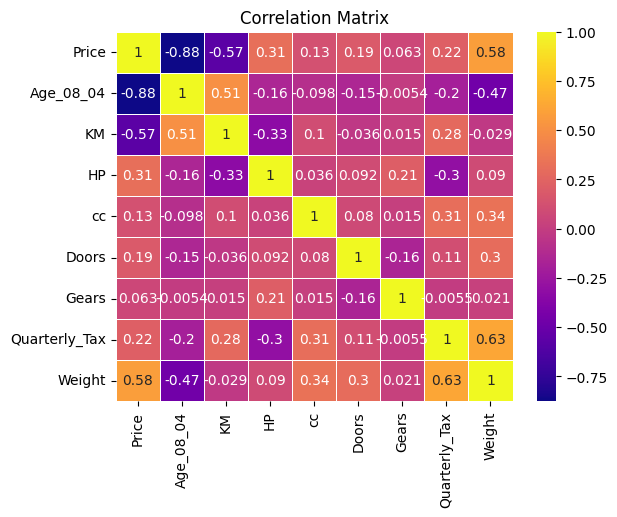

In [7]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

As we can see that cc,Doors,Quaterly_Tax,Gears have less relationship, first we make a model with these columns if the model doesnt fit well we remove the columns and then make the model to see that the model is good fit

In [9]:
data = data.rename({'Age_08_04': 'Age'}, axis=1)
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [33]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


<Axes: xlabel='Age', ylabel='Price'>

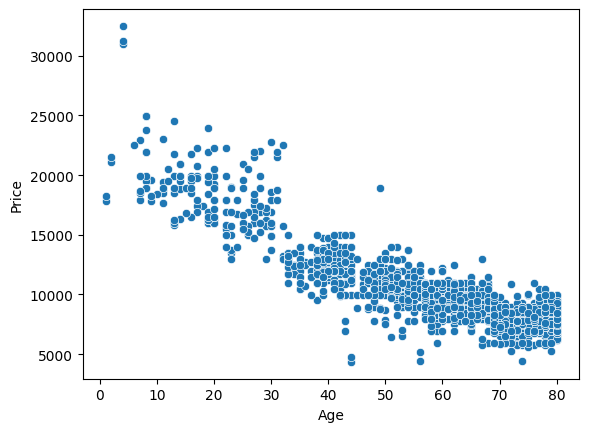

In [10]:
sns.scatterplot(x='Age',y='Price',data=data)

<Axes: xlabel='KM', ylabel='Price'>

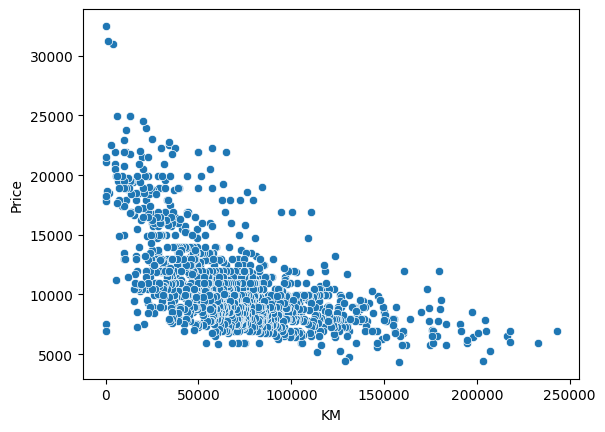

In [11]:
sns.scatterplot(x='KM',y='Price',data=data)

<Axes: xlabel='HP', ylabel='Price'>

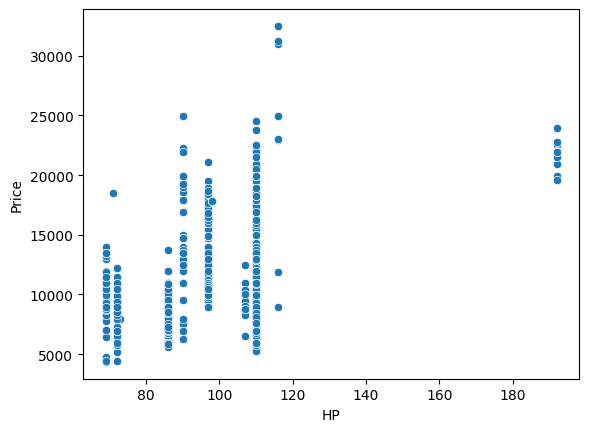

In [12]:
sns.scatterplot(x='HP',y='Price',data=data)

<Axes: xlabel='cc', ylabel='Price'>

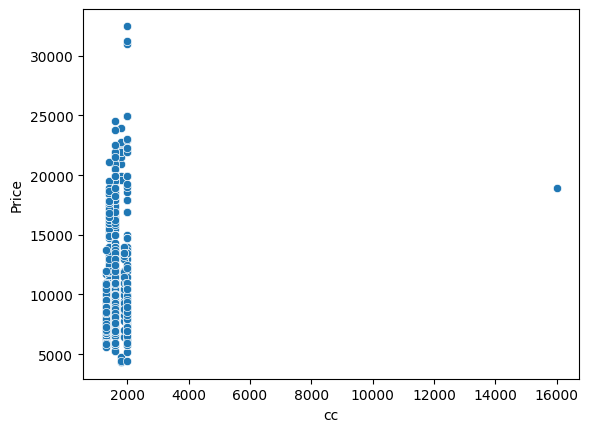

In [13]:
sns.scatterplot(x='cc',y='Price',data=data)

<Axes: xlabel='Doors', ylabel='Price'>

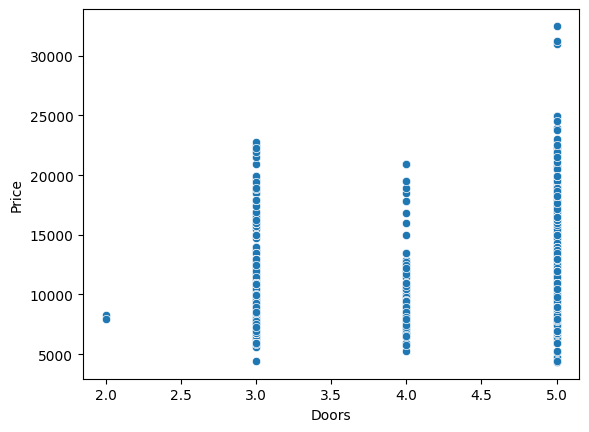

In [14]:
sns.scatterplot(x='Doors',y='Price',data=data)

<Axes: xlabel='Gears', ylabel='Price'>

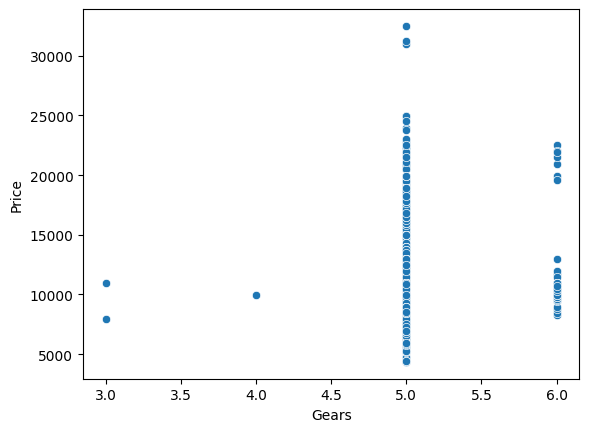

In [15]:
sns.scatterplot(x='Gears',y='Price',data=data)

<Axes: xlabel='Quarterly_Tax', ylabel='Price'>

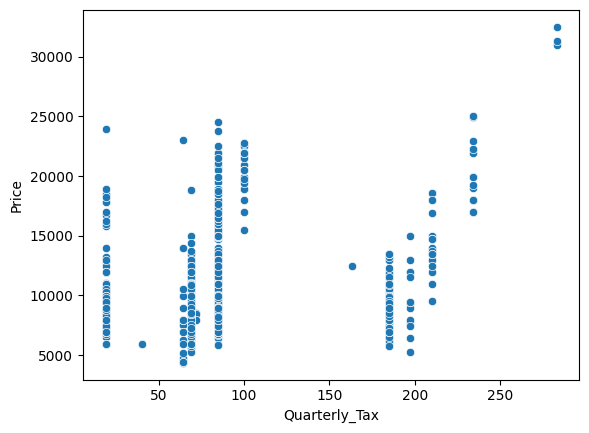

In [16]:
sns.scatterplot(x='Quarterly_Tax',y='Price',data=data)

<Axes: xlabel='Weight', ylabel='Price'>

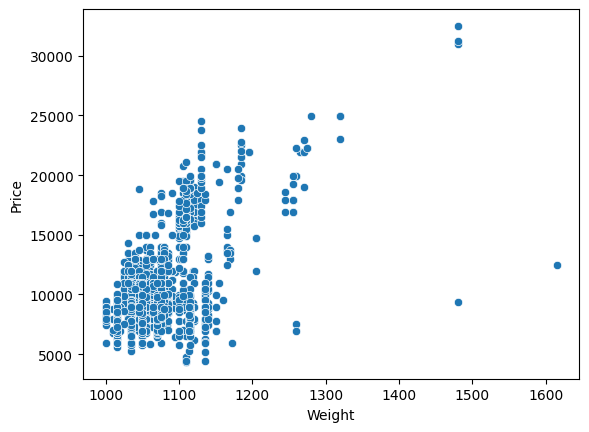

In [17]:
sns.scatterplot(x='Weight',y='Price',data=data)

In [18]:
data['Quarterly_Tax'].value_counts()

85     613
69     559
185     96
19      72
100     19
234     19
210     18
64      18
197     14
283      3
72       3
163      1
40       1
Name: Quarterly_Tax, dtype: int64

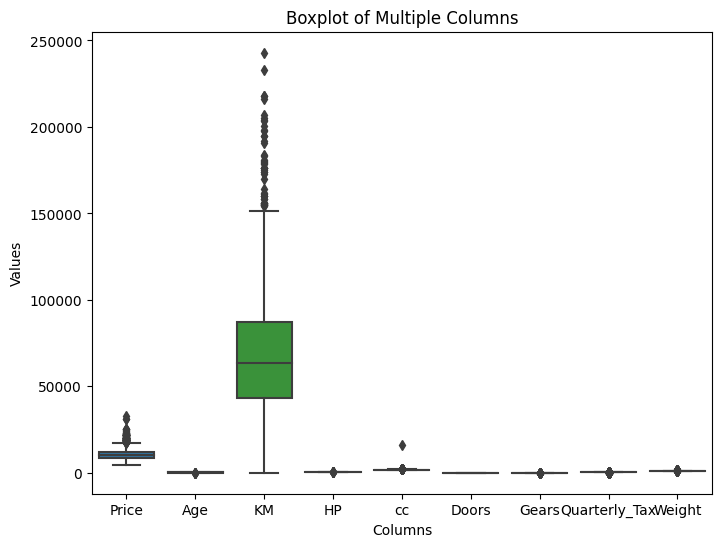

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, orient='v')

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Boxplot of Multiple Columns")

plt.show()

In [20]:
data_KM = data.drop(columns='KM')

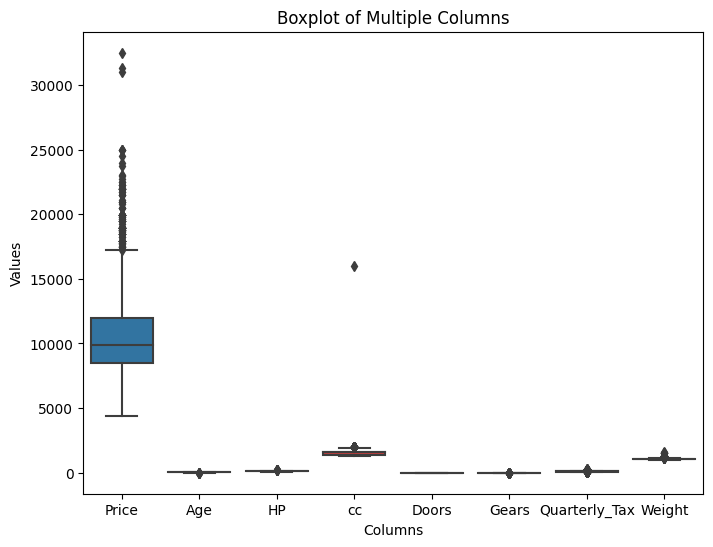

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data_KM, orient='v')

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Boxplot of Multiple Columns")

plt.show()

In [22]:
data.dtypes

Price            int64
Age              int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [23]:
data.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [24]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [25]:
data = data.drop_duplicates()

In [26]:
data.shape

(1435, 9)

In [27]:
data['cc'].value_counts()

1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64

In [28]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

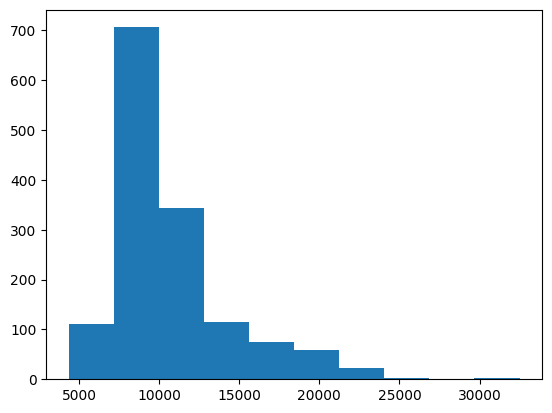

In [29]:
plt.hist(data['Price'])
plt.show()

In [30]:
X.head()

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [31]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 8), (287, 8), (1148,), (287,))

In [60]:
#standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [61]:
X_train

array([[ 1.29017616, -0.05469575,  0.59695519, ..., -0.14352303,
        -0.05460402,  0.03780719],
       [ 0.64207717,  2.29745752, -1.04482056, ..., -0.14352303,
        -0.43976782, -1.07034556],
       [-0.27606307, -0.41396171,  0.59695519, ..., -0.14352303,
        -0.05460402,  0.13015325],
       ...,
       [ 1.29017616,  0.44078692,  0.59695519, ..., -0.14352303,
        -0.05460402, -0.05453888],
       [-0.11403832, -0.7838667 ,  0.59695519, ..., -0.14352303,
        -0.43976782, -0.60861525],
       [ 0.26401942,  0.84260903,  0.59695519, ..., -0.14352303,
        -0.05460402, -0.05453888]])

In [62]:
X_test

array([[ 0.40315329,  1.32021355,  0.46834776, ..., -0.13315591,
         2.88573218,  0.9018001 ],
       [-0.39849794,  0.85324698, -2.04696401, ..., -0.13315591,
         2.57368277,  1.61176519],
       [-0.77260185, -1.05451869, -0.32919012, ..., -0.13315591,
        -0.02672897, -0.22040279],
       ...,
       [-0.2381677 , -0.47581172, -1.00402986, ..., -0.13315591,
        -0.44279485, -0.56393428],
       [ 0.67037037, -0.67613761,  0.46834776, ..., -0.13315591,
        -0.44279485, -0.44942378],
       [-1.14670576, -0.96126353, -0.32919012, ..., -0.13315591,
        -0.02672897, -0.22040279]])

Fitting Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred_test = model.predict(X_test)

In [65]:
y_pred_train = model.predict(X_train)

In [66]:
from sklearn.metrics import r2_score
R2_score_train = r2_score(y_train, y_pred_train )
R2_score_test = r2_score(y_test, y_pred_test)
print(R2_score_train,' ',R2_score_test)

0.8657941427507743   0.8219622281280091


As we can see that the model has 82% prediction value on the test data which model doesnt know about so that we can say that the model is good fit

Using MinMax Scaler

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_min = sc.fit_transform(X_train)
X_test_min = sc.fit_transform(X_test)

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_min,y_train)

LinearRegression()

In [73]:
y_pred_test_min = model.predict(X_test_min)

In [74]:
y_pred_train_min = model.predict(X_train_min)

In [75]:
R2_Score_train = r2_score(y_train, y_pred_train_min)
R2_Score_test = r2_score(y_test, y_pred_test_min)
print(R2_Score_train,' ',R2_Score_test)

0.8657941427507743   0.6059757308991133
